# Covid-19 Analysis of New Jersey

### Mohammad Siddiqui
### Final Project

In this project I will closely look at the growth of COVID-19 pandemic in the state of New Jersey. 
I decided to work on this project to visualize the cases and deaths in this state. As we all know New Jersey is one of the many states that was hardest hit by this pandemic costing a lot of lives let aside the economic effects. I will by means of charts, graphs and pictures show the data we obtained from Kaggle and some other data we collected from the census bureau website. 

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
import plotly.offline as ply
import plotly.graph_objs as go
ply.init_notebook_mode(connected=True)
from urllib.request import urlopen
import json

In [81]:
# import nytimes csv dataset from kaggle using pandas
df_state = pd.read_csv(r'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [82]:
# display the dataframe
print(df_state.tail())

             date          state  fips   cases  deaths
23549  2021-05-04       Virginia    51  662696   10823
23550  2021-05-04     Washington    53  410494    5575
23551  2021-05-04  West Virginia    54  154551    2695
23552  2021-05-04      Wisconsin    55  663105    7582
23553  2021-05-04        Wyoming    56   58367     710


In [83]:
# filter the dataset to show cases in new jersey
df_NJ = df_state[df_state.state=='New Jersey'][['date','cases','deaths']].reset_index(drop=True).copy()
print(df_NJ.tail(10))

           date    cases  deaths
417  2021-04-25   997891   25380
418  2021-04-26   988886   25399
419  2021-04-27   991010   25460
420  2021-04-28   993121   25495
421  2021-04-29   995365   25529
422  2021-04-30   997222   25554
423  2021-05-01   998811   25588
424  2021-05-02  1000009   25600
425  2021-05-03  1000992   25616
426  2021-05-04  1001996   25658


### Let's take a look at how the total number of cases are increasing everyday

In [84]:
fig = px.line(df_NJ, x='date', y='cases', title = 'Total Cases in NJ')

fig.show()

As we can see the steep increase in the number of cases through the end of March all the way through the start of May and the slope of the curve just flattens, showcasing us that the number of cases are leveling or THE CURVE IS FLATTENING

In [85]:
fig = px.line(df_NJ, x='date', y='deaths', title = 'Total Deaths in NJ')

fig.show()

From this graph, we see how steeply the number of deaths rose during the mid of April, we will further analyze both the number of deaths and cases in the graphs that follow.

###  Getting the total population of NJ by using data from census bureau 

In [86]:
population = pd.read_excel(r'C:\Users\moham\OneDrive\Documents\Finalpythonproject\nst-est2019-01.xlsx')
population.tail(10)

table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)  \
56                                     .West Virginia                                                             
57                                         .Wisconsin                                                             
58                                           .Wyoming                                                             
59                                                NaN                                                             
60                                        Puerto Rico                                                             
61  Note: The estimates are based on the 2010 Cens...                                                             
62                                Suggested Citation:                                                             
63  Table 1. Annual Estimates of the Resident Popu...                                                             
64    Source: U.S. Census Bureau, Population Division                                                             
65                        Release Date: December 2019                                                             

   Unnamed: 1 Unnamed: 2 Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
56    1852994    1853018    1854239   1856301.0   1856872.0   1853914.0   
57    5686986    5687285    5690475   5705288.0   5719960.0   5736754.0   
58     563626     563775     564487    567299.0    576305.0    582122.0   
59        NaN        NaN        NaN         NaN         NaN         NaN   
60    3725789    3726157    3721525   3678732.0   3634488.0   3593077.0   
61        NaN        NaN        NaN         NaN         NaN         NaN   
62        NaN        NaN        NaN         NaN         NaN         NaN   
63        NaN        NaN        NaN         NaN         NaN         NaN   
64        NaN        NaN        NaN         NaN         NaN         NaN   
65        NaN        NaN        NaN         NaN         NaN         NaN   

    Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  
56   1849489.0   1842050.0   1831023.0    1817004.0    1804291.0    1792147.0  
57   5751525.0   5760940.0   5772628.0    5790186.0    5807406.0    5822434.0  
58    582531.0    585613.0    584215.0     578931.0     577601.0     578759.0  
59         NaN         NaN         NaN          NaN          NaN          NaN  
60   3534874.0   3473232.0   3406672.0    3325286.0    3193354.0    3193694.0  
61         NaN         NaN         NaN          NaN          NaN          NaN  
62         NaN         NaN         NaN          NaN          NaN          NaN  
63         NaN         NaN         NaN          NaN          NaN          NaN  
64         NaN         NaN         NaN          NaN          NaN          NaN  
65         NaN         NaN         NaN          NaN          NaN          NaN

#### Cleaning the dataset to show us population of NJ in 2019

In [87]:
population.columns

Index(['table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

Giving sensible names to the columns

In [88]:
population.columns = ['states', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12']
population.head(3)

states           Unnamed: 1  \
0  Table 1. Annual Estimates of the Resident Popu...                  NaN   
1                                    Geographic Area  2010-04-01 00:00:00   
2                                                NaN               Census   

       Unnamed: 2                          Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0             NaN                                 NaN         NaN         NaN   
1             NaN  Population Estimate (as of July 1)         NaN         NaN   
2  Estimates Base                                2010      2011.0      2012.0   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1         NaN         NaN         NaN         NaN          NaN          NaN   
2      2013.0      2014.0      2015.0      2016.0       2017.0       2018.0   

   Unnamed: 12  
0          NaN  
1          NaN  
2       2019.0

Dropping the first 2 columns as they don't help us in the research

In [89]:
population = population.drop(['Unnamed: 1', 'Unnamed: 2'], axis=1)
population.head(3)

states  \
0  Table 1. Annual Estimates of the Resident Popu...   
1                                    Geographic Area   
2                                                NaN   

                           Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0                                 NaN         NaN         NaN         NaN   
1  Population Estimate (as of July 1)         NaN         NaN         NaN   
2                                2010      2011.0      2012.0      2013.0   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  
0         NaN         NaN         NaN          NaN          NaN          NaN  
1         NaN         NaN         NaN          NaN          NaN          NaN  
2      2014.0      2015.0      2016.0       2017.0       2018.0       2019.0

In [90]:
population = population.drop([0,1])
population.head(3)

states Unnamed: 3   Unnamed: 4   Unnamed: 5   Unnamed: 6  \
2            NaN       2010       2011.0       2012.0       2013.0   
3  United States  309321666  311556874.0  313830990.0  315993715.0   
4      Northeast   55380134   55604223.0   55775216.0   55901806.0   

    Unnamed: 7   Unnamed: 8   Unnamed: 9  Unnamed: 10  Unnamed: 11  \
2       2014.0       2015.0       2016.0       2017.0       2018.0   
3  318301008.0  320635163.0  322941311.0  324985539.0  326687501.0   
4   56006011.0   56034684.0   56042330.0   56059240.0   56046620.0   

   Unnamed: 12  
2       2019.0  
3  328239523.0  
4   55982803.0

Now giving proper year names to the column heads

In [91]:
population.columns = ['states', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017','2018','2019']
population.head(5)

states       2010         2011         2012         2013  \
2            NaN       2010       2011.0       2012.0       2013.0   
3  United States  309321666  311556874.0  313830990.0  315993715.0   
4      Northeast   55380134   55604223.0   55775216.0   55901806.0   
5        Midwest   66974416   67157800.0   67336743.0   67560379.0   
6          South  114866680  116006522.0  117241208.0  118364400.0   

          2014         2015         2016         2017         2018  \
2       2014.0       2015.0       2016.0       2017.0       2018.0   
3  318301008.0  320635163.0  322941311.0  324985539.0  326687501.0   
4   56006011.0   56034684.0   56042330.0   56059240.0   56046620.0   
5   67745167.0   67860583.0   67987540.0   68126781.0   68236628.0   
6  119624037.0  120997341.0  122351760.0  123542189.0  124569433.0   

          2019  
2       2019.0  
3  328239523.0  
4   55982803.0  
5   68329004.0  
6  125580448.0

In [92]:
population = population.drop([2,3,4,5,6,7])
population.head()

states      2010        2011        2012        2013        2014  \
8      .Alabama   4785437   4799069.0   4815588.0   4830081.0   4841799.0   
9       .Alaska    713910    722128.0    730443.0    737068.0    736283.0   
10     .Arizona   6407172   6472643.0   6554978.0   6632764.0   6730413.0   
11    .Arkansas   2921964   2940667.0   2952164.0   2959400.0   2967392.0   
12  .California  37319502  37638369.0  37948800.0  38260787.0  38596972.0   

          2015        2016        2017        2018        2019  
8    4852347.0   4863525.0   4874486.0   4887681.0   4903185.0  
9     737498.0    741456.0    739700.0    735139.0    731545.0  
10   6829676.0   6941072.0   7044008.0   7158024.0   7278717.0  
11   2978048.0   2989918.0   3001345.0   3009733.0   3017804.0  
12  38918045.0  39167117.0  39358497.0  39461588.0  39512223.0

In [93]:
population = population.drop([59,61,62,63,64,65])
population.tail(10)

states      2010        2011        2012        2013        2014  \
50      .Tennessee   6355311   6399291.0   6453898.0   6494340.0   6541223.0   
51          .Texas  25241971  25645629.0  26084481.0  26480266.0  26964333.0   
52           .Utah   2775332   2814384.0   2853375.0   2897640.0   2936879.0   
53        .Vermont    625879    627049.0    626090.0    626210.0    625214.0   
54       .Virginia   8023699   8101155.0   8185080.0   8252427.0   8310993.0   
55     .Washington   6742830   6826627.0   6897058.0   6963985.0   7054655.0   
56  .West Virginia   1854239   1856301.0   1856872.0   1853914.0   1849489.0   
57      .Wisconsin   5690475   5705288.0   5719960.0   5736754.0   5751525.0   
58        .Wyoming    564487    567299.0    576305.0    582122.0    582531.0   
60     Puerto Rico   3721525   3678732.0   3634488.0   3593077.0   3534874.0   

          2015        2016        2017        2018        2019  
50   6591170.0   6646010.0   6708799.0   6771631.0   6829174.0  
51  27470056.0  27914410.0  28295273.0  28628666.0  28995881.0  
52   2981835.0   3041868.0   3101042.0   3153550.0   3205958.0  
53    625216.0    623657.0    624344.0    624358.0    623989.0  
54   8361808.0   8410106.0   8463587.0   8501286.0   8535519.0  
55   7163657.0   7294771.0   7423362.0   7523869.0   7614893.0  
56   1842050.0   1831023.0   1817004.0   1804291.0   1792147.0  
57   5760940.0   5772628.0   5790186.0   5807406.0   5822434.0  
58    585613.0    584215.0    578931.0    577601.0    578759.0  
60   3473232.0   3406672.0   3325286.0   3193354.0   3193694.0

Finally reducing the dataset to only show the population of NJ in the year 2019

In [94]:
nj_pop = population[30:31]
nj_pop

states     2010       2011       2012       2013       2014  \
38  .New Jersey  8799446  8828117.0  8844942.0  8856972.0  8864525.0   

         2015       2016       2017       2018       2019  
38  8867949.0  8870827.0  8885525.0  8886025.0  8882190.0

In [95]:
nj_pop['2019']

38    8882190.0
Name: 2019, dtype: float64

Here we were able to calculate the total population of the state of NJ with the 2019 census data

In [96]:
nj_population = 8882190

### Adding new cases and deaths columns to the dataset

Now in our New Jersey Dataset we will add columns for daily new deaths and daily new cases.
The approach will be fairly simple and we will just take the difference of current count and previous days count for both deaths and cases. 
For now we will keep the focus at the whole State and then apply similar approaches to counties 

In [97]:
df_NJ.head()

date  cases  deaths
0  2020-03-04      1       0
1  2020-03-05      2       0
2  2020-03-06      4       0
3  2020-03-07      4       0
4  2020-03-08      6       0

In [98]:
df_NJ['Everyday new cases'] = df_NJ.cases.diff()
df_NJ.tail(10)

date    cases  deaths  Everyday new cases
417  2021-04-25   997891   25380              1694.0
418  2021-04-26   988886   25399             -9005.0
419  2021-04-27   991010   25460              2124.0
420  2021-04-28   993121   25495              2111.0
421  2021-04-29   995365   25529              2244.0
422  2021-04-30   997222   25554              1857.0
423  2021-05-01   998811   25588              1589.0
424  2021-05-02  1000009   25600              1198.0
425  2021-05-03  1000992   25616               983.0
426  2021-05-04  1001996   25658              1004.0

In [99]:
df_NJ['Everyday new deaths'] = df_NJ.deaths.diff()
df_NJ.tail(10)

date    cases  deaths  Everyday new cases  Everyday new deaths
417  2021-04-25   997891   25380              1694.0                 13.0
418  2021-04-26   988886   25399             -9005.0                 19.0
419  2021-04-27   991010   25460              2124.0                 61.0
420  2021-04-28   993121   25495              2111.0                 35.0
421  2021-04-29   995365   25529              2244.0                 34.0
422  2021-04-30   997222   25554              1857.0                 25.0
423  2021-05-01   998811   25588              1589.0                 34.0
424  2021-05-02  1000009   25600              1198.0                 12.0
425  2021-05-03  1000992   25616               983.0                 16.0
426  2021-05-04  1001996   25658              1004.0                 42.0

Restructing the dataframe to show colums in desired order

In [100]:
df_NJ = df_NJ[['date', 'cases', 'Everyday new cases', 'deaths', 'Everyday new deaths']]
df_NJ.tail(10)

date    cases  Everyday new cases  deaths  Everyday new deaths
417  2021-04-25   997891              1694.0   25380                 13.0
418  2021-04-26   988886             -9005.0   25399                 19.0
419  2021-04-27   991010              2124.0   25460                 61.0
420  2021-04-28   993121              2111.0   25495                 35.0
421  2021-04-29   995365              2244.0   25529                 34.0
422  2021-04-30   997222              1857.0   25554                 25.0
423  2021-05-01   998811              1589.0   25588                 34.0
424  2021-05-02  1000009              1198.0   25600                 12.0
425  2021-05-03  1000992               983.0   25616                 16.0
426  2021-05-04  1001996              1004.0   25658                 42.0

Let us get the average number of new cases and deaths everyday 

In [101]:
# Everyday case average
df_NJ['Everyday case average'] = df_NJ['Everyday new cases'].rolling(window=4).mean()

df_NJ.tail(10)

date    cases  Everyday new cases  deaths  Everyday new deaths  \
417  2021-04-25   997891              1694.0   25380                 13.0   
418  2021-04-26   988886             -9005.0   25399                 19.0   
419  2021-04-27   991010              2124.0   25460                 61.0   
420  2021-04-28   993121              2111.0   25495                 35.0   
421  2021-04-29   995365              2244.0   25529                 34.0   
422  2021-04-30   997222              1857.0   25554                 25.0   
423  2021-05-01   998811              1589.0   25588                 34.0   
424  2021-05-02  1000009              1198.0   25600                 12.0   
425  2021-05-03  1000992               983.0   25616                 16.0   
426  2021-05-04  1001996              1004.0   25658                 42.0   

     Everyday case average  
417                2635.25  
418                -423.50  
419                -601.00  
420                -769.00  
421                -631.50  
422                2084.00  
423                1950.25  
424                1722.00  
425                1406.75  
426                1193.50

In [102]:
# Everyday death average
df_NJ['Everyday death average'] = df_NJ['Everyday new deaths'].rolling(window=4).mean()

df_NJ.tail(10)

date    cases  Everyday new cases  deaths  Everyday new deaths  \
417  2021-04-25   997891              1694.0   25380                 13.0   
418  2021-04-26   988886             -9005.0   25399                 19.0   
419  2021-04-27   991010              2124.0   25460                 61.0   
420  2021-04-28   993121              2111.0   25495                 35.0   
421  2021-04-29   995365              2244.0   25529                 34.0   
422  2021-04-30   997222              1857.0   25554                 25.0   
423  2021-05-01   998811              1589.0   25588                 34.0   
424  2021-05-02  1000009              1198.0   25600                 12.0   
425  2021-05-03  1000992               983.0   25616                 16.0   
426  2021-05-04  1001996              1004.0   25658                 42.0   

     Everyday case average  Everyday death average  
417                2635.25                   32.00  
418                -423.50                   29.25  
419                -601.00                   33.00  
420                -769.00                   32.00  
421                -631.50                   37.25  
422                2084.00                   38.75  
423                1950.25                   32.00  
424                1722.00                   26.25  
425                1406.75                   21.75  
426                1193.50                   26.00

Again arranging the dataframe in the right order

In [103]:
df_NJ = df_NJ[['date', 'cases', 'Everyday new cases', 'Everyday case average','deaths', 'Everyday new deaths', 'Everyday death average']]
df_NJ.tail(10)

date    cases  Everyday new cases  Everyday case average  deaths  \
417  2021-04-25   997891              1694.0                2635.25   25380   
418  2021-04-26   988886             -9005.0                -423.50   25399   
419  2021-04-27   991010              2124.0                -601.00   25460   
420  2021-04-28   993121              2111.0                -769.00   25495   
421  2021-04-29   995365              2244.0                -631.50   25529   
422  2021-04-30   997222              1857.0                2084.00   25554   
423  2021-05-01   998811              1589.0                1950.25   25588   
424  2021-05-02  1000009              1198.0                1722.00   25600   
425  2021-05-03  1000992               983.0                1406.75   25616   
426  2021-05-04  1001996              1004.0                1193.50   25658   

     Everyday new deaths  Everyday death average  
417                 13.0                   32.00  
418                 19.0                   29.25  
419                 61.0                   33.00  
420                 35.0                   32.00  
421                 34.0                   37.25  
422                 25.0                   38.75  
423                 34.0                   32.00  
424                 12.0                   26.25  
425                 16.0                   21.75  
426                 42.0                   26.00

Let's now look at the average cases and death with respect to the population of NJ in 2019 which we found out earlier from the data provided by census bureau

In [104]:
# moving average of new cases in NJ
df_NJ['Everyday new cases norm'] = 1000000*df_NJ['Everyday new cases']/nj_population
df_NJ.tail()

date    cases  Everyday new cases  Everyday case average  deaths  \
422  2021-04-30   997222              1857.0                2084.00   25554   
423  2021-05-01   998811              1589.0                1950.25   25588   
424  2021-05-02  1000009              1198.0                1722.00   25600   
425  2021-05-03  1000992               983.0                1406.75   25616   
426  2021-05-04  1001996              1004.0                1193.50   25658   

     Everyday new deaths  Everyday death average  Everyday new cases norm  
422                 25.0                   38.75               209.070060  
423                 34.0                   32.00               178.897321  
424                 12.0                   26.25               134.876646  
425                 16.0                   21.75               110.670904  
426                 42.0                   26.00               113.035186

In [105]:
df_NJ['Everyday new cases norm average'] = df_NJ['Everyday new cases norm'].rolling(window=4).mean()
df_NJ.tail()

date    cases  Everyday new cases  Everyday case average  deaths  \
422  2021-04-30   997222              1857.0                2084.00   25554   
423  2021-05-01   998811              1589.0                1950.25   25588   
424  2021-05-02  1000009              1198.0                1722.00   25600   
425  2021-05-03  1000992               983.0                1406.75   25616   
426  2021-05-04  1001996              1004.0                1193.50   25658   

     Everyday new deaths  Everyday death average  Everyday new cases norm  \
422                 25.0                   38.75               209.070060   
423                 34.0                   32.00               178.897321   
424                 12.0                   26.25               134.876646   
425                 16.0                   21.75               110.670904   
426                 42.0                   26.00               113.035186   

     Everyday new cases norm average  
422                       234.626821  
423                       219.568597  
424                       193.871106  
425                       158.378733  
426                       134.370015

In [106]:
# moving average of new deaths in NJ
df_NJ['Everyday new deaths norm'] = 1000000*df_NJ['Everyday new deaths']/nj_population
df_NJ.tail()

date    cases  Everyday new cases  Everyday case average  deaths  \
422  2021-04-30   997222              1857.0                2084.00   25554   
423  2021-05-01   998811              1589.0                1950.25   25588   
424  2021-05-02  1000009              1198.0                1722.00   25600   
425  2021-05-03  1000992               983.0                1406.75   25616   
426  2021-05-04  1001996              1004.0                1193.50   25658   

     Everyday new deaths  Everyday death average  Everyday new cases norm  \
422                 25.0                   38.75               209.070060   
423                 34.0                   32.00               178.897321   
424                 12.0                   26.25               134.876646   
425                 16.0                   21.75               110.670904   
426                 42.0                   26.00               113.035186   

     Everyday new cases norm average  Everyday new deaths norm  
422                       234.626821                  2.814621  
423                       219.568597                  3.827885  
424                       193.871106                  1.351018  
425                       158.378733                  1.801358  
426                       134.370015                  4.728564

In [107]:
df_NJ['Everyday new deaths norm average'] = df_NJ['Everyday new deaths norm'].rolling(window=4).mean()
df_NJ.tail()

date    cases  Everyday new cases  Everyday case average  deaths  \
422  2021-04-30   997222              1857.0                2084.00   25554   
423  2021-05-01   998811              1589.0                1950.25   25588   
424  2021-05-02  1000009              1198.0                1722.00   25600   
425  2021-05-03  1000992               983.0                1406.75   25616   
426  2021-05-04  1001996              1004.0                1193.50   25658   

     Everyday new deaths  Everyday death average  Everyday new cases norm  \
422                 25.0                   38.75               209.070060   
423                 34.0                   32.00               178.897321   
424                 12.0                   26.25               134.876646   
425                 16.0                   21.75               110.670904   
426                 42.0                   26.00               113.035186   

     Everyday new cases norm average  Everyday new deaths norm  \
422                       234.626821                  2.814621   
423                       219.568597                  3.827885   
424                       193.871106                  1.351018   
425                       158.378733                  1.801358   
426                       134.370015                  4.728564   

     Everyday new deaths norm average  
422                          4.362663  
423                          3.602715  
424                          2.955352  
425                          2.448720  
426                          2.927206

### Let's plot this infomation on a graph and see what we get

In [108]:
# everyday new cases in NJ
fig = px.bar(df_NJ, x='date', y='Everyday new cases', title='Everyday new cases in NJ')

fig.add_traces(go.Scatter(x=df_NJ['date'], y = df_NJ['Everyday case average'],
                                    mode='lines',
                                    marker_color = 'black',
                                    name='moving average of new cases') 
              )


fig.show()

This graph tells us the growth in the number of cases everyday and the moving average line shows us the 4 day average of the raise in the number of cases. There was a very high growth in the number of cases from April 3rd to April 23rd. With some very big bars. Even the average cases was over 3500 during this period. The good news is that this growth was reduced considerably from the start of May and was 1447* cases on the last day of data entry (number changes everyday the code is run) and the average was 1660*. 

In [109]:
# everyday new deaths in NJ
fig = px.bar(df_NJ, x='date', y='Everyday new deaths', title='Everyday new deaths in NJ')

fig.add_traces(go.Scatter(x=df_NJ['date'], y = df_NJ['Everyday death average'],
                                    mode='lines',
                                    marker_color = 'red',
                                    name='moving average of new deaths') 
              )


fig.show()

The deaths follow about the same trend as the cases. The highest number of recorded deaths were on April 30th, topping 458 deaths on this day. However, the number of deaths is rather irregular and we can tell with the average line for deaths that the trends were very unusual. The number seems to come down and jumps back up inconsistently. Hopefully this downward trend will not jump back up again. 

#### Daily cases and deaths in terms of 1000000 people in the state of NJ

In [110]:
# cases per 1000000
fig = px.bar(df_NJ, x='date', y='Everyday new cases norm', title = 'New Cases per Million People')
fig.add_traces(go.Scatter(x=df_NJ['date'], y = df_NJ['Everyday new cases norm average'],
                                    mode='lines',
                                    marker_color = 'purple',
                                    name='moving average of new deaths') 
              )

fig.show()

In [111]:
# deaths per 1000000 
fig = px.bar(df_NJ, x='date', y='Everyday new deaths norm', title = 'New Deaths per Million people')
fig.add_traces(go.Scatter(x=df_NJ['date'], y = df_NJ['Everyday new deaths norm average'],
                                    mode='lines',
                                    marker_color = 'gray',
                                    name='moving average of new deaths') 
              )

fig.show()

We can see here that the number of deaths per million NJ residents spiked at almost 42 on May 1st. Currently almost 19 deaths per million can be observed. 

Also, for the number of cases we can see that currently the average number of cases per million is 186. The average peaked at 436 on April 6th. So there is a considerable drop which is good for the state and community

## Representing data for county

In [112]:
df = pd.read_csv(r"C:\Users\moham\OneDrive\Documents\Finalpythonproject\Covid-19-NJ-Counties.csv", index_col='Date', parse_dates=['Date'])

In [113]:
df.tail()

Atlantic  Bergen  Burlington  Camden  Cape May  Cumberland  Essex  \
Date                                                                            
2020-05-05      1190   16460        3207    4251       369         985  14840   
2020-05-06      1246   16520        3235    4307       378        1059  14951   
2020-05-07      1302   16609        3367    4479       401        1090  15095   
2020-05-08      1423   16709        3431    4619       424        1124  15256   
2020-05-09      1494   16804        3531    4758       442        1245  15365   

            Gloucester  Hudson  Hunterdon  ...  Passaic  Salem  Somerset  \
Date                                       ...                             
2020-05-05        1467   16099        679  ...    13797    347      3820   
2020-05-06        1499   16197        682  ...    13971    353      3860   
2020-05-07        1548   16354        685  ...    14133    358      3914   
2020-05-08        1593   16520        701  ...    14280    363      3968   
2020-05-09        1631   16675        706  ...    14428    400      3996   

            Sussex  Union  Warren  Total Positive Cases  Total Negative Cases  \
Date                                                                            
2020-05-05     987  13503     982                130593              157030.0   
2020-05-06     995  13604     993                131890              154686.0   
2020-05-07    1006  13781    1004                133635              159023.0   
2020-05-08    1015  13917    1034                135454              163305.0   
2020-05-09    1023  13984    1040                137085              168121.0   

            Deaths  Under Investigation  
Date                                     
2020-05-05    8244                550.0  
2020-05-06    8549                594.0  
2020-05-07    8801                552.0  
2020-05-08    8952                553.0  
2020-05-09    9116                557.0  

[5 rows x 25 columns]

The dataset has data from:

In [114]:
date1 = min(df.index).date()
date2 = max(df.index).date()
print(date1, 'to', date2)

2020-03-09 to 2020-05-09


##### Cleaning some of the data

In [115]:
counties_df = df.drop(['Total Positive Cases','Total Negative Cases','Deaths','Under Investigation'], axis=1)
counties_df.tail()

Atlantic  Bergen  Burlington  Camden  Cape May  Cumberland  Essex  \
Date                                                                            
2020-05-05      1190   16460        3207    4251       369         985  14840   
2020-05-06      1246   16520        3235    4307       378        1059  14951   
2020-05-07      1302   16609        3367    4479       401        1090  15095   
2020-05-08      1423   16709        3431    4619       424        1124  15256   
2020-05-09      1494   16804        3531    4758       442        1245  15365   

            Gloucester  Hudson  Hunterdon  ...  Middlesex  Monmouth  Morris  \
Date                                       ...                                
2020-05-05        1467   16099        679  ...      13142      6490    5625   
2020-05-06        1499   16197        682  ...      13254      6552    5655   
2020-05-07        1548   16354        685  ...      13411      6649    5702   
2020-05-08        1593   16520        701  ...      13617      6752    5767   
2020-05-09        1631   16675        706  ...      13759      6815    5833   

            Ocean  Passaic  Salem  Somerset  Sussex  Union  Warren  
Date                                                                
2020-05-05   7060    13797    347      3820     987  13503     982  
2020-05-06   7125    13971    353      3860     995  13604     993  
2020-05-07   7209    14133    358      3914    1006  13781    1004  
2020-05-08   7277    14280    363      3968    1015  13917    1034  
2020-05-09   7366    14428    400      3996    1023  13984    1040  

[5 rows x 21 columns]

In [116]:
counties = set(counties_df.columns)
counties

{'Atlantic',
 'Bergen',
 'Burlington',
 'Camden',
 'Cape May',
 'Cumberland',
 'Essex',
 'Gloucester',
 'Hudson',
 'Hunterdon',
 'Mercer',
 'Middlesex',
 'Monmouth',
 'Morris',
 'Ocean',
 'Passaic',
 'Salem',
 'Somerset',
 'Sussex',
 'Union',
 'Warren'}

#### Number of cases by county

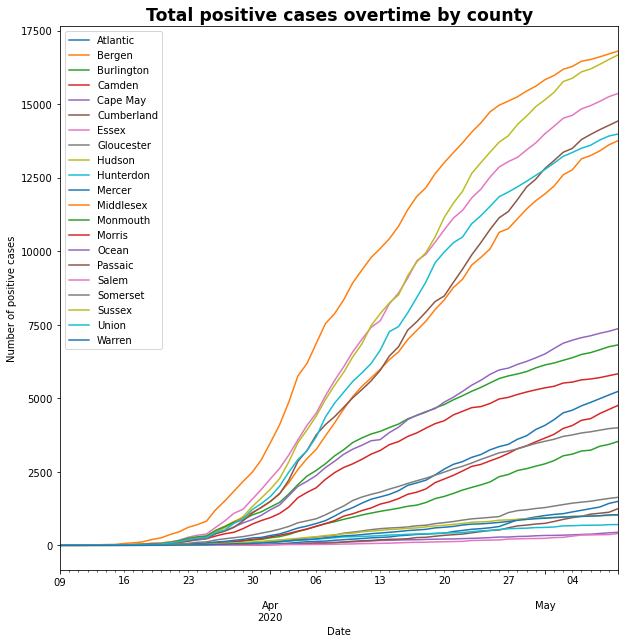

In [117]:
line = counties_df.plot(figsize=(10,10))
line.set_ylabel('Number of positive cases')
line.set_xlabel('Date')
line.set_title("Total positive cases overtime by county", fontweight = 'bold', fontsize = 'xx-large')
plt.show()


We can see here that the cases are very high in some counties. Let us shift our attention to these counties with high cases first.

Top 10 counties with the highest number of cases

In [118]:
high_cases = df.iloc[-1][counties].nlargest(10).index
list(high_cases)

['Bergen',
 'Hudson',
 'Essex',
 'Passaic',
 'Union',
 'Middlesex',
 'Ocean',
 'Monmouth',
 'Morris',
 'Mercer']

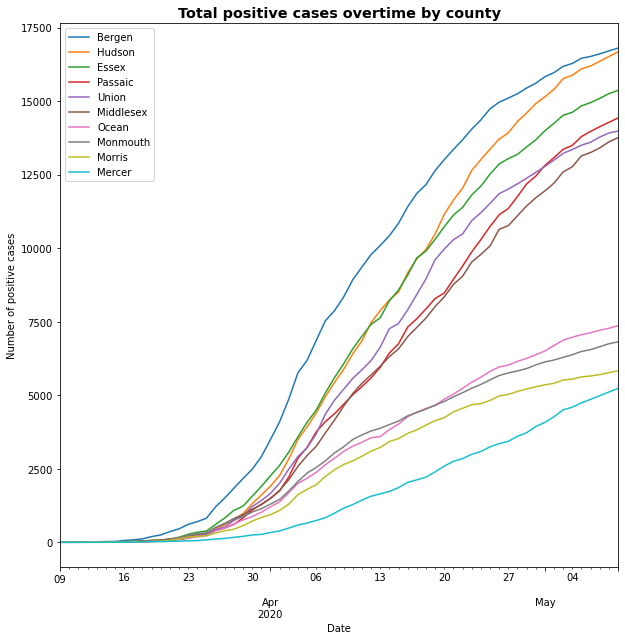

In [119]:
high_case = df[list(high_cases)]
line2 = high_case.plot(figsize=(10,10))
line2.set_ylabel('Number of positive cases')
line2.set_xlabel('Date')
line2.set_title("Total positive cases overtime by county", fontweight = 'bold', fontsize = 'x-large')
plt.show()

### Map of NJ Counties for COVID-19 cases

In [120]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as r:
    geojson = json.load(r)


geojson['features'][-10]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US56021',
  'STATE': '56',
  'COUNTY': '021',
  'NAME': 'Laramie',
  'LSAD': 'County',
  'CENSUSAREA': 2685.912},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-104.653338, 41.653007],
    [-104.652992, 41.565014],
    [-104.05254, 41.564274],
    [-104.052531, 41.552723],
    [-104.052584, 41.55265],
    [-104.052692, 41.541154],
    [-104.052686, 41.539111],
    [-104.052476, 41.522343],
    [-104.052478, 41.515754],
    [-104.05234, 41.417865],
    [-104.05216, 41.407662],
    [-104.052287, 41.393307],
    [-104.052287, 41.393214],
    [-104.052324, 41.321144],
    [-104.052476, 41.320961],
    [-104.052568, 41.316202],
    [-104.052453, 41.278202],
    [-104.052574, 41.278019],
    [-104.052666, 41.275251],
    [-104.053142, 41.114457],
    [-104.053083, 41.104985],
    [-104.053025, 41.090274],
    [-104.053177, 41.089725],
    [-104.053097, 41.018045],
    [-104.053158, 41.016809],
    [-104.053249, 41.001406],
    [-10

In [121]:
nj_counties = dict()
nj_counties['type'] = geojson['type']
nj_counties['features'] = []
for item in geojson['features']:
    if int(item['id']) >= 34001 and int(item['id']) <= 34041:
        nj_counties['features'].append(item)

Importing the counties of NJ

In [122]:
melted_df = df[counties].reset_index().melt(id_vars='Date', var_name='County', value_name='Total Cases')
melted_df['New Cases'] = melted_df.groupby('County')['Total Cases'].transform(lambda x: x.diff().rolling(4, 1).mean())
melted_df['Date'] = melted_df['Date'].astype('str')

In [123]:
melted_df.tail()

Date  County  Total Cases  New Cases
1297  2020-05-05  Bergen        16460     157.50
1298  2020-05-06  Bergen        16520     136.50
1299  2020-05-07  Bergen        16609     106.00
1300  2020-05-08  Bergen        16709     106.75
1301  2020-05-09  Bergen        16804      86.00

In [124]:
fig = px.choropleth(melted_df, geojson=nj_counties, color="Total Cases",
                    locations="County", featureidkey="properties.NAME",
                    projection="mercator", animation_frame="Date", color_continuous_scale='viridis_r',
                    title='Total Cases')
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(margin={"r":20,"t":30,"l":0,"b":0})
fig.show()

Here we can see that the most of the cases are in the North Jersey counties. 